In [54]:
pip install pandas_profiling --upgrade

In [60]:
import numpy as np
import datetime
import pandas as pd
import pandas_profiling
import plotly
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [61]:
train = pd.read_csv('/content/train.csv')
feature=pd.read_csv('/content/features.csv')
test=pd.read_csv('/content/test.csv')
stores=pd.read_csv('/content/stores.csv')

In [62]:
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)
#
test_bt = pd.merge(test,stores)
test = pd.merge(test_bt,feature)

In [63]:
print(train.shape)
print(test.shape)

(421570, 16)
(115064, 15)


In [64]:
train = train[(train.Store==1)].groupby(["Date"]).agg({"Weekly_Sales":sum, "IsHoliday": "first", 
                                                       "Type": "first", "Size": "first", "Temperature": "first",
                                                      "Fuel_Price":"first", "MarkDown1":"first", "MarkDown2":"first",
                                                      "MarkDown3":"first", "MarkDown4":"first", "MarkDown5": "first",
                                                      "CPI":"first", "Unemployment":"first"}).reset_index()
test = test[(test.Store==1)].groupby(["Date"]).agg({"IsHoliday": "first", 
                                                       "Type": "first", "Size": "first", "Temperature": "first",
                                                      "Fuel_Price":"first", "MarkDown1":"first", "MarkDown2":"first",
                                                      "MarkDown3":"first", "MarkDown4":"first", "MarkDown5": "first",
                                                      "CPI":"first", "Unemployment":"first"}).reset_index()

In [65]:
train.head(5)

,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2010-02-05,1643690.90,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,2010-02-12,1641957.44,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,2010-02-19,1611968.17,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,2010-02-26,1409727.59,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,2010-03-05,1554806.68,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [66]:
test.head(5)

,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [67]:
train.describe()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,1.430000e+02,143.0,143.000000,143.000000,51.000000,42.000000,50.000000,51.000000,51.000000,143.000000,143.000000
mean,1.555264e+06,151315.0,68.306783,3.219699,8090.766275,2941.315476,1225.400400,3746.084706,5018.654902,215.996892,7.610420
std,1.559808e+05,0.0,14.250486,0.427313,6606.895728,7955.538483,7879.963965,5999.640785,3281.844937,4.350890,0.383749
min,1.316899e+06,151315.0,35.400000,2.514000,410.310000,0.500000,0.250000,8.000000,554.920000,210.337426,6.573000
25%,1.458105e+06,151315.0,58.265000,2.764500,4089.630000,41.660000,6.212500,589.750000,3178.035000,211.549277,7.348000
50%,1.534850e+06,151315.0,69.640000,3.290000,6154.140000,144.870000,25.965000,1822.550000,4325.190000,215.459905,7.787000
75%,1.614892e+06,151315.0,80.485000,3.594000,9997.650000,1447.435000,95.725000,3695.005000,6185.645000,220.531330,7.838000
max,2.387950e+06,151315.0,91.650000,3.907000,34577.060000,46011.380000,55805.510000,32403.870000,20475.320000,223.444251,8.106000


In [68]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]
print(numeric_var_train)
print(cat_var_train)

['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [69]:
# Creating Data audit Report
# Use a general function that returns multiple values    
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
 
num_summary=train_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Weekly_Sales,143.0,0.0,2.224028e+08,1.555264e+06,1.534850e+06,155980.767761,2.433000e+10,1.316899e+06,1.322719e+06,1.372790e+06,1.395035e+06,1.458105e+06,1.534850e+06,1.614892e+06,1.686378e+06,1.818131e+06,2.170704e+06,2.387950e+06
Size,143.0,0.0,2.163804e+07,1.513150e+05,1.513150e+05,0.000000,0.000000e+00,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05,1.513150e+05
Temperature,143.0,0.0,9.767870e+03,6.830678e+01,6.964000e+01,14.250486,2.030764e+02,3.540000e+01,3.728040e+01,4.394100e+01,4.797200e+01,5.826500e+01,6.964000e+01,8.048500e+01,8.548400e+01,8.698300e+01,9.041560e+01,9.165000e+01
Fuel_Price,143.0,0.0,4.604170e+02,3.219699e+00,3.290000e+00,0.427313,1.825960e-01,2.514000e+00,2.553460e+00,2.603500e+00,2.633800e+00,2.764500e+00,3.290000e+00,3.594000e+00,3.733200e+00,3.813600e+00,3.903060e+00,3.907000e+00
MarkDown1,51.0,92.0,4.126291e+05,8.090766e+03,6.154140e+03,6606.895728,4.365107e+07,4.103100e+02,6.803200e+02,1.625320e+03,2.585850e+03,4.089630e+03,6.154140e+03,9.997650e+03,1.544140e+04,2.136643e+04,3.108092e+04,3.457706e+04
MarkDown2,42.0,101.0,1.235352e+05,2.941315e+03,1.448700e+02,7955.538483,6.329059e+07,5.000000e-01,3.165000e+00,7.507000e+00,7.824000e+00,4.166000e+01,1.448700e+02,1.447435e+03,7.493132e+03,1.091045e+04,3.609011e+04,4.601138e+04
MarkDown3,50.0,93.0,6.127002e+04,1.225400e+03,2.596500e+01,7879.963965,6.209383e+07,2.500000e-01,9.066000e-01,1.816500e+00,3.042000e+00,6.212500e+00,2.596500e+01,9.572500e+01,3.496840e+02,6.954695e+02,2.914588e+04,5.580551e+04
MarkDown4,51.0,92.0,1.910503e+05,3.746085e+03,1.822550e+03,5999.640785,3.599569e+07,8.000000e+00,9.500000e+00,5.257500e+01,2.257900e+02,5.897500e+02,1.822550e+03,3.695005e+03,8.471880e+03,1.260834e+04,2.889738e+04,3.240387e+04
MarkDown5,51.0,92.0,2.559514e+05,5.018655e+03,4.325190e+03,3281.844937,1.077051e+07,5.549200e+02,8.093500e+02,1.263600e+03,2.312850e+03,3.178035e+03,4.325190e+03,6.185645e+03,7.992720e+03,8.313295e+03,1.746857e+04,2.047532e+04
CPI,143.0,0.0,3.088756e+04,2.159969e+02,2.154599e+02,4.350890,1.893024e+01,2.103374e+02,2.103608e+02,2.108281e+02,2.112172e+02,2.115493e+02,2.154599e+02,2.205313e+02,2.219310e+02,2.224257e+02,2.234071e+02,2.234443e+02


In [70]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,143,143
NMISS,0,0
ColumnsNames,2011-06-24 1 2011-08-26 1 2012-01-27 ...,"A 143 Name: Type, dtype: int64"


In [71]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print(numeric_var_test)
print(cat_var_test)

['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [72]:
num_summary=test_num.apply(lambda x: var_summary(x)).T
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Size,39.0,0.0,5901285.000,151315.000000,151315.000,0.000000,0.000000e+00,151315.000,151315.0000,151315.0000,151315.000,151315.0000,151315.000,151315.000,151315.0000,151315.0000,151315.00000,151315.000
Temperature,39.0,0.0,2410.120,61.797949,58.590,12.594464,1.586205e+02,41.730,42.1822,44.6030,48.714,51.6700,58.590,72.985,80.1580,81.6980,83.62840,83.940
Fuel_Price,39.0,0.0,132.765,3.404231,3.422,0.165440,2.737034e-02,3.098,3.1018,3.1557,3.192,3.2435,3.422,3.512,3.6128,3.6256,3.69086,3.711
MarkDown1,39.0,0.0,355664.270,9119.596667,6343.160,12166.898939,1.480334e+08,332.170,541.7096,957.6600,2081.720,3509.7900,6343.160,11016.030,13688.0680,21332.4910,57516.08060,72937.290
MarkDown2,31.0,8.0,120752.090,3895.228710,796.700,8102.147877,6.564480e+07,2.000,2.5850,4.0600,83.880,275.9600,796.700,3437.090,6665.5200,20750.4650,33580.69000,37101.130


In [73]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=test_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,39,39
NMISS,0,0
ColumnsNames,2013-05-03 1 2012-12-14 1 2013-07-26 ...,"A 39 Name: Type, dtype: int64"


In [74]:
pandas_profiling.ProfileReport(train)

Output hidden; open in https://colab.research.google.com to view.

In [75]:
pandas_profiling.ProfileReport(test)

Output hidden; open in https://colab.research.google.com to view.

In [76]:
train_corr=pd.DataFrame(train.corr())
train_corr.head()

,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Weekly_Sales,1.000000,0.194905,NaN,-0.222701,0.124592,0.090808,-0.109071,0.373671,0.088901,-0.034559,0.225408,-0.097955
IsHoliday,0.194905,1.000000,NaN,-0.200543,-0.085903,-0.078720,0.426252,0.484969,-0.017194,-0.115828,-0.028919,0.082949
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.222701,-0.200543,NaN,1.000000,0.228493,0.128972,-0.467411,-0.087130,0.025732,-0.292917,0.118503,-0.180695
Fuel_Price,0.124592,-0.085903,NaN,0.228493,1.000000,0.092808,-0.301010,-0.179147,0.011074,-0.235280,0.755259,-0.513944


In [77]:
test_corr=pd.DataFrame(test.corr())
test_corr.head()

,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
IsHoliday,1.000000,NaN,-0.214432,-0.280884,0.148541,0.357966,0.559365,0.183316,-0.210719,-0.230417,0.200933
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.214432,NaN,1.000000,0.336865,-0.201800,-0.482224,-0.066495,0.007447,-0.034466,0.253266,-0.443008
Fuel_Price,-0.280884,NaN,0.336865,1.000000,0.148132,-0.534721,-0.198360,0.087760,-0.019585,0.711146,-0.405883
MarkDown1,0.148541,NaN,-0.201800,0.148132,1.000000,0.073433,-0.115803,0.579960,0.288449,0.021922,0.082735


<AxesSubplot:>

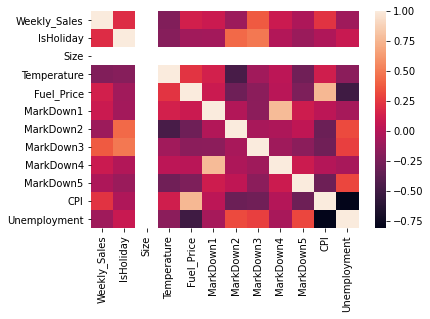

In [78]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train.corr())

<AxesSubplot:>

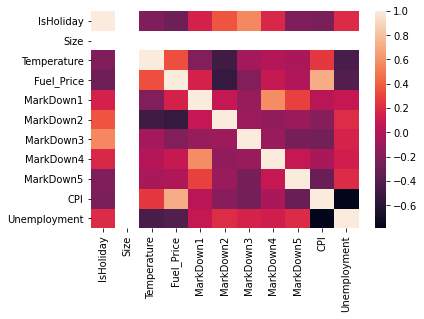

In [79]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(test.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

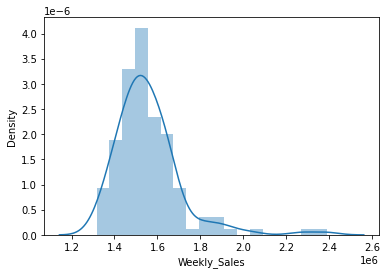

In [80]:
sns.distplot(train.Weekly_Sales)

In [81]:
print(train.isnull().sum())
print("*"*30)
print(test.isnull().sum())

Date              0
Weekly_Sales      0
IsHoliday         0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1        92
MarkDown2       101
MarkDown3        93
MarkDown4        92
MarkDown5        92
CPI               0
Unemployment      0
dtype: int64
******************************
Date             0
IsHoliday        0
Type             0
Size             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        8
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI             13
Unemployment    13
dtype: int64


In [82]:
train=train.fillna(0)
test=test.fillna(0)

In [83]:
print(train.isnull().sum())
print("*"*30)
print(test.isnull().sum())

Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [84]:
train.Weekly_Sales=np.where(train.Weekly_Sales>2000000, 2000000,train.Weekly_Sales)

<AxesSubplot:ylabel='Frequency'>

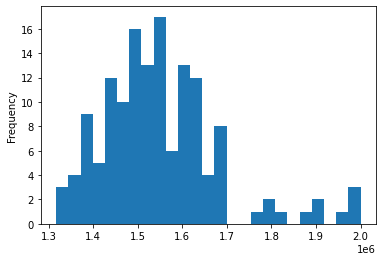

In [85]:
train.Weekly_Sales.plot.hist(bins=25)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
 2   IsHoliday     143 non-null    bool   
 3   Type          143 non-null    object 
 4   Size          143 non-null    int64  
 5   Temperature   143 non-null    float64
 6   Fuel_Price    143 non-null    float64
 7   MarkDown1     143 non-null    float64
 8   MarkDown2     143 non-null    float64
 9   MarkDown3     143 non-null    float64
 10  MarkDown4     143 non-null    float64
 11  MarkDown5     143 non-null    float64
 12  CPI           143 non-null    float64
 13  Unemployment  143 non-null    float64
dtypes: bool(1), float64(10), int64(1), object(2)
memory usage: 14.8+ KB


In [87]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [88]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day 

In [89]:
print(train.Type.value_counts())
print("*"*30)
print(test.Type.value_counts())

A    143
Name: Type, dtype: int64
******************************
A    39
Name: Type, dtype: int64


In [90]:
print(train.IsHoliday.value_counts())
print("*"*30)
print(test.IsHoliday.value_counts())

False    133
True      10
Name: IsHoliday, dtype: int64
******************************
False    36
True      3
Name: IsHoliday, dtype: int64


In [91]:
train_test_data = [train, test]

In [92]:

type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [93]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [94]:
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [95]:
train.head(5)

,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,2010-02-05,1643690.90,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,2010-02-12,1641957.44,1,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,4,2,2010,12
2,2010-02-19,1611968.17,0,1,151315,39.93,2.514,0.0,0.0,0.0,0.0,4,2,2010,19
3,2010-02-26,1409727.59,0,1,151315,46.63,2.561,0.0,0.0,0.0,0.0,4,2,2010,26
4,2010-03-05,1554806.68,0,1,151315,46.50,2.625,0.0,0.0,0.0,0.0,4,3,2010,5


In [96]:
train['Date'] = train['Date'].astype('datetime64[ns]')
train.rename(columns = {'Date': 'ds', 'Weekly_Sales': 'y'}, inplace = True)

In [97]:
#df = train[['ts', 'y']]
df = train[['ds', 'Temperature', 'Fuel_Price', 'IsHoliday', 'y']]

In [98]:
df.sort_values(by=["ds"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df = df.set_index('ds')

<AxesSubplot:xlabel='ds'>

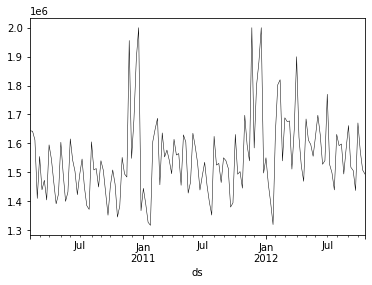

In [100]:
df['y'].plot(linewidth=0.5, alpha=0.99, color='black')

In [101]:
!pip install neuralprophet

In [102]:
!pip install greykite 

In [103]:
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster 
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results
from greykite.framework.templates.autogen.forecast_config import ModelComponentsParam
from greykite.algo.changepoint.adalasso.changepoint_detector import ChangepointDetector
from greykite.framework.benchmark.data_loader_ts import DataLoaderTS
from greykite.framework.input.univariate_time_series import UnivariateTimeSeries

## Trend

In [104]:
model = ChangepointDetector()
res = model.find_trend_changepoints(
 df=df.reset_index(),  # data df
 time_col="ds",  # time column name
 value_col="y",  # value column name
 yearly_seasonality_order=10,  # yearly seasonality order, fit along with trend
 regularization_strength=0.5,  # between 0.0 and 1.0, greater values imply fewer changepoints, and 1.0 implies no changepoints
 resample_freq="7D",  # data aggregation frequency, eliminate small fluctuation/seasonality
 potential_changepoint_n=25,  # the number of potential changepoints
 yearly_seasonality_change_freq="365D",  # varying yearly seasonality for every year
 no_changepoint_distance_from_end="365D")  # the proportion of data from end where changepoints are not allowed
fig = model.plot(
 observation=True,
 trend_estimate=False,
 trend_change=True,
 yearly_seasonality_estimate=False,
 adaptive_lasso_estimate=True,
 plot=False)
plotly.io.show(fig, renderer="colab")

## Seasonality

In [105]:
ts = UnivariateTimeSeries()
ts.load_data(
            df=df.reset_index(),
            time_col="ds",
            value_col="y",
            freq="W-FRI")

In [106]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="doy",  # day of quarter
     show_mean=True,
     show_quantiles=True,
     show_overlays=20,  # randomly selects up to 20 overlays
     # No explicit overlay feature. Each overlay is a single cycle (quarter)
     center_values=True,
     xlabel="day of year",
     ylabel=ts.original_value_col,
     title="yearly seasonality",
 )
plotly.io.show(fig, renderer="colab")

In [107]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="dom",  # day of quarter
     show_mean=True,
     show_quantiles=True,
     show_overlays=20,  # randomly selects up to 20 overlays
     # No explicit overlay feature. Each overlay is a single cycle (quarter)
     center_values=True,
     xlabel="day of month",
     ylabel=ts.original_value_col,
     title="monthly seasonality",
 )
plotly.io.show(fig, renderer="colab")

## Silverkite

In [108]:
# Specifies dataset information
metadata = MetadataParam(
     time_col="ds",  # name of the time column
     value_col="y",  # name of the value column
     freq="W-FRI",  #"MS" for Montly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc.
     train_end_date=datetime.datetime(2012, 6, 8)
)

forecaster = Forecaster()
result = forecaster.run_forecast_config(
     df = df.reset_index(),
     config = ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=20,  # forecasts 20 steps ahead
         coverage=0.95,  # 95% prediction intervals        
         metadata_param=metadata,
         model_components_param=ModelComponentsParam(
             autoregression=None,
             regressors={
             "regressor_cols": ["Temperature", "Fuel_Price", "IsHoliday"]
             },
             events={
                 "holidays_to_model_separately": "auto",
                 "holiday_lookup_countries": ["UnitedStates"]
             },
              growth = {
                 "growth_term": "linear"
             },
             changepoints = {
                 "changepoints_dict": dict(
                     method="auto",
                     yearly_seasonality_order=10,
                     regularization_strength=0.5,
                     potential_changepoint_n=5,
                     yearly_seasonality_change_freq="365D",
                     no_changepoint_distance_from_end="365D"
                 )
             }
         )
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/greykite/algo/forecast/silverkite/forecast_simple_silverkite_helper.py:130: UserWarning:

Requested holiday 'Chinese New Year' does not occur in the provided countries

/usr/local/lib/python3.7/dist-packages/greykite/algo/forecast/silverkite/forecast_simple_silverkite_helper.py:130: UserWarning:

Requested holiday 'Good Friday' does not occur in the provided countries

/usr/local/lib/python3.7/dist-packages/greykite/algo/forecast/silverkite/forecast_simple_silverkite_helper.py:130: UserWarning:

Requested holiday 'Easter Monday [England, Wales, Northern Ireland]' does not occur in the provided countries

/usr/local/lib/python3.7/dist-packages/greykite/algo/changepoint/adalasso/changepoints_utils.py:1352: UserWarning:

No yearly seasonality changepoint added. Either data length is too shortor yearly_seasonality_change_freq is too long.

/usr/local/lib/python3.7/dist-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:2206: UserWarning

In [109]:
result.forecast.compute_evaluation_metrics_split()

{'Test': {'CORR': 0.9099488230194828,
  'Coverage Diff: Actual_Coverage - Intended_Coverage': -0.04999999999999993,
  'Coverage: Lower Band': 0.65,
  'Coverage: Upper Band': 0.25,
  'MAE': 25709.70699946985,
  'MAPE': 1.6306610277659797,
  'MSE': 1290303437.053842,
  'MedAE': 16789.687495702645,
  'MedAPE': 1.1135080954475036,
  'Outside Tolerance (fraction)': None,
  'OutsideTolerance1p': 0.5,
  'OutsideTolerance2p': 0.25,
  'OutsideTolerance3p': 0.15,
  'OutsideTolerance4p': 0.15,
  'OutsideTolerance5p': 0.05,
  'Prediction Band Coverage (fraction)': 0.9,
  'Prediction Band Width (%)': 9.653393602107414,
  'Q80': 9346.122752301828,
  'Q95': 7591.757378585278,
  'Q99': 7123.926612260865,
  'R2': 0.8046330190646201,
  'R2_null_model_score': None,
  'RMSE': 35920.79393685282,
  'sMAPE': 0.8104662080914871},
 'Train': {'CORR': 0.9636500247615208,
  'Coverage Diff: Actual_Coverage - Intended_Coverage': 0.0012195121951219523,
  'Coverage: Lower Band': 0.5121951219512195,
  'Coverage: Upper

In [110]:
result.forecast.plot()

Figure({
    'data': [{'legendgroup': 'interval',
              'line': {'color': 'rgba(0, 90, 181, 0.5)', 'width': 0.0},
              'mode': 'lines',
              'name': 'Lower Bound',
              'type': 'scatter',
              'uid': 'afe9808e-db60-41c0-9682-e16edeb1868f',
              'x': array([datetime.datetime(2010, 2, 5, 0, 0),
                          datetime.datetime(2010, 2, 12, 0, 0),
                          datetime.datetime(2010, 2, 19, 0, 0),
                          datetime.datetime(2010, 2, 26, 0, 0),
                          datetime.datetime(2010, 3, 5, 0, 0),
                          datetime.datetime(2010, 3, 12, 0, 0),
                          datetime.datetime(2010, 3, 19, 0, 0),
                          datetime.datetime(2010, 3, 26, 0, 0),
                          datetime.datetime(2010, 4, 2, 0, 0),
                          datetime.datetime(2010, 4, 9, 0, 0),
                          datetime.datetime(2010, 4, 16, 0, 0),
                

In [111]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(grid_search=grid_search, decimals=2,
    # The below saves space in the printed output. Remove to show all available metrics and columns.
    cv_report_metrics=None,
    column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params,[]
rank_test_MAPE,1
mean_test_MAPE,5.39
split_test_MAPE,"(8.81, 2.62, 4.76)"
mean_train_MAPE,2.42
split_train_MAPE,"(1.37, 3.29, 2.58)"
mean_fit_time,7.81
mean_score_time,0.74


## Neural Prophet

In [112]:
df = df.reset_index()

In [113]:
print(df.ds.min())
print(df.ds.max())

2010-02-05 00:00:00
2012-10-26 00:00:00


In [114]:
test_length = 20
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

In [115]:
model = NeuralProphet(loss_func='MSE', n_changepoints=2, seasonality_mode='additive')
model.add_future_regressor('Temperature')
model.add_future_regressor('Fuel_Price')
model.add_future_regressor('IsHoliday')

In [116]:
metrics = model.fit(df_train, freq="W")

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 260


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-03
Epoch[260/260]: 100%|██████████| 260/260 [00:09<00:00, 27.42it/s, MSELoss=0.0459, MAE=7.66e+4, RegLoss=0]


In [117]:
future_df = model.make_future_dataframe(df_test, periods = test_length, n_historic_predictions=len(df_test), 
                                        regressors_df=df_test)

In [118]:
future_df.head()

,ds,Temperature,Fuel_Price,IsHoliday,y,t,y_scaled
0,2012-06-15,0.798035,0.669393,0.0,1630607.00,1.008197,0.775509
1,2012-06-22,0.782787,0.638947,0.0,1527845.81,1.016393,0.554233
2,2012-06-29,0.885865,0.600081,0.0,1540421.49,1.024590,0.581312
3,2012-07-06,0.833294,0.561862,0.0,1769854.16,1.032787,1.075351
4,2012-07-13,0.762617,0.580648,0.0,1527014.04,1.040984,0.552442


In [119]:
forecast = model.predict(future_df)

In [120]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,future_regressors_additive,future_regressor_Fuel_Price,future_regressor_IsHoliday,future_regressor_Temperature
0,2012-06-15,1630607.00,1633837.125,3230.125,1357290.375,-19460.207031,296006.87500,139404.843750,0.0,156602.046875
1,2012-06-22,1527845.81,1599667.000,71821.190,1359187.250,-46194.609375,286674.43750,133064.421875,0.0,153610.031250
2,2012-06-29,1540421.49,1569079.500,28658.010,1361084.000,-90812.062500,298807.62500,124970.273438,0.0,173837.343750
3,2012-07-06,1769854.16,1508311.625,-261542.535,1362980.875,-135201.328125,280532.12500,117011.031250,0.0,163521.109375
4,2012-07-13,1527014.04,1474387.125,-52626.915,1364877.625,-161065.546875,270575.03125,120923.203125,0.0,149651.828125


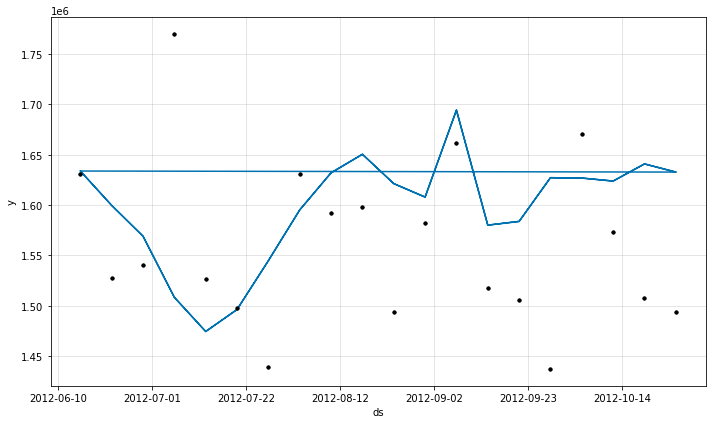

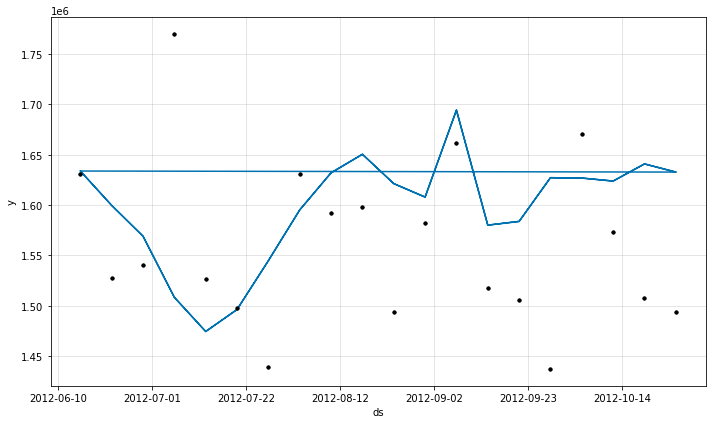

In [121]:
model.plot(forecast)

In [122]:
df_test['neural_prophet'] = forecast.iloc[-test_length:].loc[:, 'yhat1']

In [123]:
print(f"NeuralProphet:\t{mean_absolute_percentage_error(df_test['y'], forecast.iloc[-test_length:]['yhat1']):.4f}")

NeuralProphet:	0.0495


In [124]:
silverkite_df = result.forecast.df_test
prophet_df = forecast.head(test_length)

print(silverkite_df.shape, prophet_df.shape)

(20, 5) (20, 10)


In [125]:
silverkite_df.set_index('ds', inplace=True)
silverkite_df.head()

,actual,forecast,forecast_lower,forecast_upper
ds,,,,
2012-06-15,1630607.00,1.603102e+06,1.528007e+06,1.678197e+06
2012-06-22,1527845.81,1.562270e+06,1.487175e+06,1.637365e+06
2012-06-29,1540421.49,1.535392e+06,1.460297e+06,1.610487e+06
2012-07-06,1769854.16,1.679639e+06,1.604544e+06,1.754734e+06
2012-07-13,1527014.04,1.551088e+06,1.475993e+06,1.626183e+06


In [126]:
prophet_df.set_index('ds', inplace=True)
prophet_df.head()

,y,yhat1,residual1,trend,season_yearly,future_regressors_additive,future_regressor_Fuel_Price,future_regressor_IsHoliday,future_regressor_Temperature
ds,,,,,,,,,
2012-06-15,1630607.00,1633837.125,3230.125,1357290.375,-19460.207031,296006.87500,139404.843750,0.0,156602.046875
2012-06-22,1527845.81,1599667.000,71821.190,1359187.250,-46194.609375,286674.43750,133064.421875,0.0,153610.031250
2012-06-29,1540421.49,1569079.500,28658.010,1361084.000,-90812.062500,298807.62500,124970.273438,0.0,173837.343750
2012-07-06,1769854.16,1508311.625,-261542.535,1362980.875,-135201.328125,280532.12500,117011.031250,0.0,163521.109375
2012-07-13,1527014.04,1474387.125,-52626.915,1364877.625,-161065.546875,270575.03125,120923.203125,0.0,149651.828125


In [127]:
print(f"Silverkite(MAPE):\t{mean_absolute_percentage_error(silverkite_df['actual'], silverkite_df['forecast']):.4f}")
print(f"NeuralProphet(MAPE:\t{mean_absolute_percentage_error(prophet_df['y'], prophet_df['yhat1']):.4f}")

print(f"Silverkite(RMSE):\t{math.sqrt(mean_squared_error(silverkite_df['actual'], silverkite_df['forecast'])):.4f}")
print(f"NeuralProphet(RMSE):\t{math.sqrt(mean_squared_error(prophet_df['y'], prophet_df['yhat1'])):.4f}")

Silverkite(MAPE):	0.0163
NeuralProphet(MAPE:	0.0495
Silverkite(RMSE):	35920.7939
NeuralProphet(RMSE):	99876.1015


<AxesSubplot:xlabel='ds'>

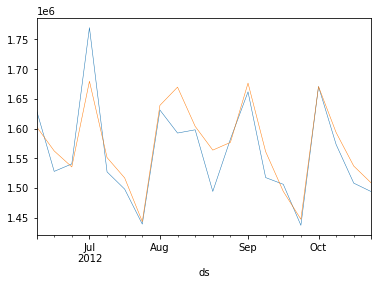

In [128]:
silverkite_df['actual'].plot(linewidth=0.5)
silverkite_df['forecast'].plot(linewidth=0.5)

<AxesSubplot:xlabel='ds'>

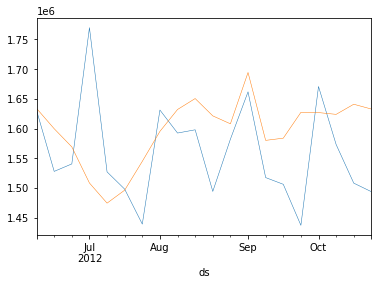

In [129]:
prophet_df['y'].plot(linewidth=0.5)
prophet_df['yhat1'].plot(linewidth=0.5)